In [1]:
%load_ext autoreload
%autoreload 2

In [58]:
from FinancialDataAPI import FinancialDataAPI
from datetime import date, datetime, timedelta
import pandas as pd

In [36]:
api = FinancialDataAPI()

In [37]:
api.list_data_sets()

['industries',
 'balance-annual',
 'balance-quarterly',
 'balance-ttm',
 'cashflow-annual',
 'cashflow-quarterly',
 'cashflow-ttm',
 'companies',
 'income-annual',
 'income-quarterly',
 'income-ttm',
 'shareprices-daily']

In [38]:
api.get_data_set('companies').head()

,Ticker,SimFinId,Company Name,IndustryId
0,A,45846,AGILENT TECHNOLOGIES INC,106001.0
1,AA,367153,Alcoa Corp,110004.0
2,AAC_delist,939324,"AAC Holdings, Inc.",106011.0
3,AAL,68568,American Airlines Group Inc.,100006.0
4,AAMC,847094,Altisource Asset Management Corp,104001.0


In [39]:
api.get_classification(level='Sector')

['Industrials',
 'Technology',
 'Consumer Defensive',
 'Consumer Cyclical',
 'Financial Services',
 'Utilities',
 'Healthcare',
 'Energy',
 'Business Services',
 'Real Estate',
 'Basic Materials',
 'Other']

In [40]:
api.get_ticker_by_classification(['Technology'])[:10]

['GOOG', 'ATVI', 'ADBE', 'TWTR', 'AMSC', 'VRTU', 'APIC', 'QRVO', 'ENS', 'EGHT']

In [41]:
len(api.get_ticker_by_classification(['Technology']))

102

In [42]:
len(api.get_ticker_by_classification(['Technology'], as_of_date=date(2015,12,31)))

96

In [43]:
api.list_fields()

,Long Name,Short Name,Category,Quick Document
0,Company Name,Name,description_data,
1,Sector,Sector,description_data,
2,Industry,Industry,description_data,
3,Open,Open,pricing_data,"start: Date, end: Date, adj: Str [y/n], fill_p..."
4,Low,Low,pricing_data,"start: Date, end: Date, adj: Str [y/n], fill_p..."
...,...,...,...,...
61,Dividends Paid,Dividend Paid,fundamental_data,"pt: str [q/a/ttm], offset: int, y: int, q: in..."
62,Cash from (Repayment of) Debt,Cash from Debt,fundamental_data,"pt: str [q/a/ttm], offset: int, y: int, q: in..."
63,Cash from (Repurchase of) Equity,Cash from Equity,fundamental_data,"pt: str [q/a/ttm], offset: int, y: int, q: in..."
64,Net Cash from Financing Activities,Net Cash Financing,fundamental_data,"pt: str [q/a/ttm], offset: int, y: int, q: in..."


In [44]:
api.display_field_info('Dividends Paid')

Dividends Paid (Dividend Paid) 
  Parameters: pt, offset_start, offset_end, y_start, y_end, q_start, q_end, as_of_date_start, as_of_date_end 
  pt: str [q/a/ttm],  offset: int, y: int, q: int [1/2/3/4], as_of_date_start: Date, as_of_date_end: Date 




In [45]:
api.get_data(['IBM'], 'Sector')

,Sector
Ticker,
IBM,Technology


In [46]:
api.get_data(
    ['IBM', 'MSFT'], 'Close', 
    start=date(2010, 12, 31) - timedelta(days=30), end=date(2010, 12, 31), 
    Adj='y'
)

,Date,Close
Ticker,,
IBM,2010-12-01,101.67
IBM,2010-12-02,102.22
IBM,2010-12-03,102.36
IBM,2010-12-04,NaN
IBM,2010-12-05,NaN
...,...,...
MSFT,2010-12-27,22.22
MSFT,2010-12-28,22.17
MSFT,2010-12-29,22.14


In [47]:
api.get_data(
    ['IBM', 'MSFT'], 'Dividend', 
    start=date(2010, 12, 31) - timedelta(days=300), end=date(2010, 12, 31)
).dropna()

,Date,Dividend
Ticker,,
IBM,2010-05-06,0.65
IBM,2010-08-06,0.65
IBM,2010-11-08,0.65
MSFT,2010-05-18,0.13
MSFT,2010-08-17,0.13
MSFT,2010-11-16,0.16


In [54]:
api.get_data(
    ['MSFT', 'IBM'], 'Net Income', pt='ttm', 
    offset_start=-3, offset_end=0, 
    as_of_date_start=date(2020, 12, 31), as_of_date_end=date(2020, 12, 31)
)

,Currency,Fiscal Year,Fiscal Period,Report Date,Publish Date,Restated Date,As of Date,Net Income
Ticker,,,,,,,,
MSFT,USD,2020,Q1,2019-09-30,2019-10-23,2019-10-23,2020-12-31,41094000000
MSFT,USD,2020,Q2,2019-12-31,2020-01-29,2021-01-26,2020-12-31,44323000000
MSFT,USD,2020,Q3,2020-03-31,2020-04-29,2021-04-27,2020-12-31,46266000000
MSFT,USD,2020,Q4,2020-06-30,2020-07-30,2020-07-30,2020-12-31,44281000000
IBM,USD,2019,Q3,2019-09-30,2019-10-29,2019-10-29,2020-12-31,7715000000
IBM,USD,2019,Q4,2019-12-31,2020-02-25,2020-02-25,2020-12-31,9433000000
IBM,USD,2020,Q1,2020-03-31,2020-04-28,2021-04-27,2020-12-31,9016000000
IBM,USD,2020,Q2,2020-06-30,2020-07-28,2020-07-28,2020-12-31,7879000000


In [49]:
api.get_data(
    ['MSFT', 'IBM'], 'Net Income', pt='ttm', 
    offset_start=-3, offset_end=0, 
    as_of_date_start=date(2019, 12, 31), as_of_date_end=date(2020, 12, 31)
)

,Currency,Fiscal Year,Fiscal Period,Report Date,Publish Date,Restated Date,As of Date,Net Income
Ticker,,,,,,,,
MSFT,USD,2019,Q2,2018-12-31,2019-01-30,2020-01-29,2019-12-31,33541000000
MSFT,USD,2019,Q3,2019-03-31,2019-04-24,2020-04-29,2019-12-31,34926000000
MSFT,USD,2019,Q4,2019-06-30,2019-08-01,2020-07-30,2019-12-31,39240000000
MSFT,USD,2020,Q1,2019-09-30,2019-10-23,2019-10-23,2019-12-31,41094000000
MSFT,USD,2019,Q2,2018-12-31,2019-01-30,2020-01-29,2020-01-01,33541000000
...,...,...,...,...,...,...,...,...
IBM,USD,2020,Q2,2020-06-30,2020-07-28,2020-07-28,2020-12-30,7879000000
IBM,USD,2019,Q3,2019-09-30,2019-10-29,2019-10-29,2020-12-31,7715000000
IBM,USD,2019,Q4,2019-12-31,2020-02-25,2020-02-25,2020-12-31,9433000000


In [50]:
api.get_data(
    ['MSFT', 'IBM'], 'Net Income', pt='ttm', 
    offset_start=0, offset_end=0, 
    as_of_date_start=date(2019, 12, 31), as_of_date_end=date(2020, 12, 31)
)

,Currency,Fiscal Year,Fiscal Period,Report Date,Publish Date,Restated Date,As of Date,Net Income
Ticker,,,,,,,,
MSFT,USD,2020,Q1,2019-09-30,2019-10-23,2019-10-23,2019-12-31,41094000000
MSFT,USD,2020,Q1,2019-09-30,2019-10-23,2019-10-23,2020-01-01,41094000000
MSFT,USD,2020,Q1,2019-09-30,2019-10-23,2019-10-23,2020-01-02,41094000000
MSFT,USD,2020,Q1,2019-09-30,2019-10-23,2019-10-23,2020-01-03,41094000000
MSFT,USD,2020,Q1,2019-09-30,2019-10-23,2019-10-23,2020-01-04,41094000000
...,...,...,...,...,...,...,...,...
IBM,USD,2020,Q2,2020-06-30,2020-07-28,2020-07-28,2020-12-27,7879000000
IBM,USD,2020,Q2,2020-06-30,2020-07-28,2020-07-28,2020-12-28,7879000000
IBM,USD,2020,Q2,2020-06-30,2020-07-28,2020-07-28,2020-12-29,7879000000


In [51]:
api.get_data(
    ['MSFT', 'IBM'], 'Net Income', pt='q', 
    y_start=2013, y_end=2015, q_start=3, q_end=4, 
    as_of_date_start=date(2020, 12, 31), as_of_date_end=date(2020, 12, 31)
)

,index,Currency,Fiscal Year,Fiscal Period,Report Date,Publish Date,Restated Date,As of Date,Net Income
Ticker,,,,,,,,,
MSFT,41920,USD,2013,Q3,2013-03-31,2013-04-18,2014-04-24,2020-12-31,6055000000
MSFT,41921,USD,2013,Q4,2013-06-30,2013-07-30,2015-07-31,2020-12-31,4965000000
MSFT,41924,USD,2014,Q3,2014-03-31,2014-04-24,2015-04-23,2020-12-31,5660000000
MSFT,41925,USD,2014,Q4,2014-06-30,2014-07-31,2016-07-28,2020-12-31,4612000000
MSFT,41928,USD,2015,Q3,2015-03-31,2015-04-23,2016-04-21,2020-12-31,4985000000
MSFT,41929,USD,2015,Q4,2015-06-30,2015-07-31,2017-08-02,2020-12-31,-3195000000
IBM,30728,USD,2013,Q3,2013-09-30,2013-10-29,2014-10-28,2020-12-31,4041000000
IBM,30729,USD,2013,Q4,2013-12-31,2014-02-25,2016-02-23,2020-12-31,6184000000
IBM,30732,USD,2014,Q3,2014-09-30,2014-10-28,2015-10-27,2020-12-31,18000000


In [52]:
api.get_data(
    ['MSFT', 'IBM'], 'Net Income', pt='a', 
    y_start=2013, y_end=2015, 
    as_of_date_start=date(2020, 12, 31), as_of_date_end=date(2020, 12, 31)
)

,index,Currency,Fiscal Year,Fiscal Period,Report Date,Publish Date,Restated Date,As of Date,Net Income
Ticker,,,,,,,,,
MSFT,12138,USD,2013,FY,2013-06-30,2013-07-30,2015-07-31,2020-12-31,21863000000
MSFT,12139,USD,2014,FY,2014-06-30,2014-07-31,2016-07-28,2020-12-31,22074000000
MSFT,12140,USD,2015,FY,2015-06-30,2015-07-31,2017-08-02,2020-12-31,12193000000
IBM,8894,USD,2013,FY,2013-12-31,2014-02-25,2016-02-23,2020-12-31,16483000000
IBM,8895,USD,2014,FY,2014-12-31,2015-02-24,2017-02-28,2020-12-31,12023000000
IBM,8896,USD,2015,FY,2015-12-31,2016-02-23,2017-02-28,2020-12-31,13191000000


In [77]:
start = date(2018, 12, 31)
end = date(2019, 12, 31)

df_net_income = api.get_data(
    ['MSFT','IBM'], 'Net Income', pt='ttm', offset_start=0, offset_end=0,
    as_of_date_start=start, as_of_date_end=end
)

df_sh_out = api.get_data(
    ['MSFT','IBM'], 'Shares (Basic)', pt='ttm', offset_start=0, offset_end=0,
    as_of_date_start=start, as_of_date_end=end
)

df_price = api.get_data(['MSFT', 'IBM'], 'Close', start=start, end=end, Adj='y')
df_sh_out_mkt = api.get_data(['MSFT', 'IBM'], 'Sh Out', start=start, end=end, Adj='y')

In [82]:
df_sh_out_mkt.tail()

,Date,Shares Outstanding
Ticker,,
IBM,2019-12-27,885637454.0
IBM,2019-12-28,NaN
IBM,2019-12-29,NaN
IBM,2019-12-30,885637454.0
IBM,2019-12-31,887110455.0


<AxesSubplot:xlabel='Date'>

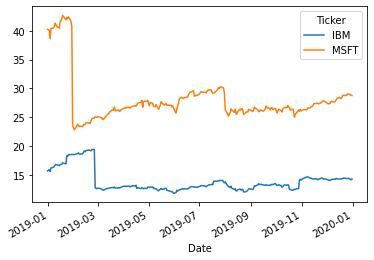

In [83]:
eps = df_net_income['Net Income'] / df_sh_out_mkt['Shares Outstanding']
df_price['PE'] = df_price['Close'] / eps
df_price.pivot_table(index='Date', columns='Ticker', values='PE').plot()

In [71]:
api.list_data_category()

['description_data', 'pricing_data', 'market_data', 'fundamental_data']

In [74]:
api.list_fields_by_category(['market_data'])

,Long Name,Short Name,Category,Quick Document
7,Dividend,Dividend,market_data,"start: Date, end: Date, fill_prev: Str [y/n]"
8,Volume,Volume,market_data,"start: Date, end: Date, fill_prev: Str [y/n]"
9,Shares Outstanding,Sh Out,market_data,"start: Date, end: Date, fill_prev: Str [y/n]"
